# CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

In [3]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Handling missing values

df.Age=df.Age.fillna(df.Age.median())
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])
df['Familysize']=df['SibSp'] + df['Parch'] +1
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','SibSp','Parch'], axis=1, inplace=True)

In [5]:
# Scaling , Encoding

le=LabelEncoder()
sc=StandardScaler()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df[['Age' , 'Fare']]=sc.fit_transform(df[['Age' , 'Fare']])
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,1,-0.565736,-0.502445,2,2
1,1,1,0,0.663861,0.786845,0,2
2,1,3,0,-0.258337,-0.488854,2,1
3,1,1,0,0.433312,0.420730,2,2
4,0,3,1,0.433312,-0.486337,2,1
...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,-0.386671,2,1
887,1,1,0,-0.796286,-0.044381,2,1
888,0,3,0,-0.104637,-0.176263,2,4
889,1,1,1,-0.258337,-0.044381,0,1


In [6]:
# Removing outliers

for i in df.columns:
    q1=np.percentile(df[i],25,method='midpoint')
    q3=np.percentile(df[i],75,method='midpoint')
    iqr=q3-q1
    upp_lim=q3+1.5*iqr
    low_lim=q1-1.5*iqr
    df[i]=df[i].clip(upper=upp_lim,lower=low_lim)

In [7]:
# Splitting

x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

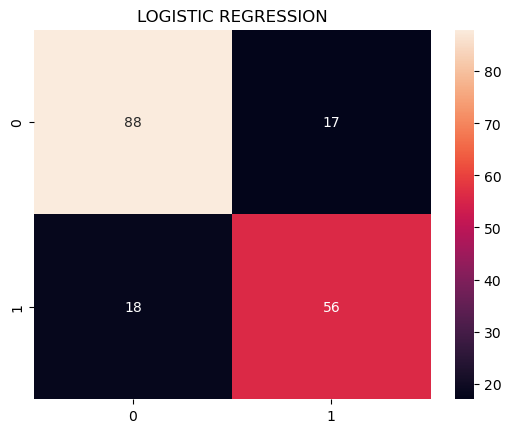


Classification Report:
                 model   accuracy  precision     recall         f1    ROU AUC  \
0  LOGISTIC REGRESSION  80.446927  76.712329  75.675676  76.190476  79.742600   
1       DECISION TREES  79.888268  83.928571  63.513514  72.307692  77.471042   
2        RANDOM FOREST  80.446927  78.260870  72.972973  75.524476  79.343629   
3                  SVM  81.005587  81.250000  70.270270  75.362319  79.420849   
4            K NEAREST  84.916201  85.074627  77.027027  80.851064  83.751609   

       confusion matrix  
0  [[88, 17], [18, 56]]  
1   [[96, 9], [27, 47]]  
2  [[90, 15], [20, 54]]  
3  [[93, 12], [22, 52]]  
4  [[95, 10], [17, 57]]  


In [8]:


# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_mod=log_reg.fit(x_train,y_train)
log_pred=log_mod.predict(x_test) 
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True)
plt.title('LOGISTIC REGRESSION')
plt.show()

print("\nClassification Report:")
model_results=[]
model_results.append([
'LOGISTIC REGRESSION',
accuracy_score(y_test,log_pred)*100,
precision_score(y_test,log_pred)*100,
recall_score(y_test,log_pred)*100,
f1_score(y_test,log_pred)*100,
roc_auc_score(y_test,log_pred)*100,
confusion_matrix(y_test,log_pred)
])

# DECISION TREES

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4)
dt_mod=dt.fit(x_train,y_train)
dt_pred=dt_mod.predict(x_test)

model_results.append([
'DECISION TREES',
accuracy_score(y_test,dt_pred)*100,
precision_score(y_test,dt_pred)*100,
recall_score(y_test,dt_pred)*100,
f1_score(y_test,dt_pred)*100,
roc_auc_score(y_test,dt_pred)*100,
confusion_matrix(y_test,dt_pred)
])

# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_mod=rf.fit(x_train,y_train)
rf_pred=rf_mod.predict(x_test)

model_results.append([
'RANDOM FOREST',
accuracy_score(y_test,rf_pred)*100,
precision_score(y_test,rf_pred)*100,
recall_score(y_test,rf_pred)*100,
f1_score(y_test,rf_pred)*100,
roc_auc_score(y_test,rf_pred)*100,
confusion_matrix(y_test,rf_pred)
])

# SVM

from sklearn.svm import SVC
svm= SVC(kernel='rbf', probability=True)
svm_mod=svm.fit(x_train,y_train)
svm_pred=svm_mod.predict(x_test)

model_results.append([
'SVM',
accuracy_score(y_test,svm_pred)*100,
precision_score(y_test,svm_pred)*100,
recall_score(y_test,svm_pred)*100,
f1_score(y_test,svm_pred)*100,
roc_auc_score(y_test,svm_pred)*100,
confusion_matrix(y_test,svm_pred)
])

# K NEAREST 

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn_mod=kn.fit(x_train,y_train)
kn_pred=kn_mod.predict(x_test)

model_results.append([
'K NEAREST',
accuracy_score(y_test,kn_pred)*100,
precision_score(y_test,kn_pred)*100,
recall_score(y_test,kn_pred)*100,
f1_score(y_test,kn_pred)*100,
roc_auc_score(y_test,kn_pred)*100,
confusion_matrix(y_test,kn_pred)
])
result=pd.DataFrame(model_results,columns=['model','accuracy','precision','recall','f1','ROU AUC','confusion matrix'])
print(result)